In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("outputs/02_output_shipments_1239.csv")

In [39]:
shipments = df.groupby(["Origin", "Destination"]).agg({"Quantity": "sum"}).reset_index()
shipments

,Origin,Destination,Quantity
0,Australia,Australia,81408
1,Australia,Brazil,133132
2,Australia,Egypt,61460
3,Australia,France,132878
4,Australia,India,60909
...,...,...,...
95,United Kingdom,Italy,79810
96,United Kingdom,Japan,66850
97,United Kingdom,Russia,96309
98,United Kingdom,South Africa,4980


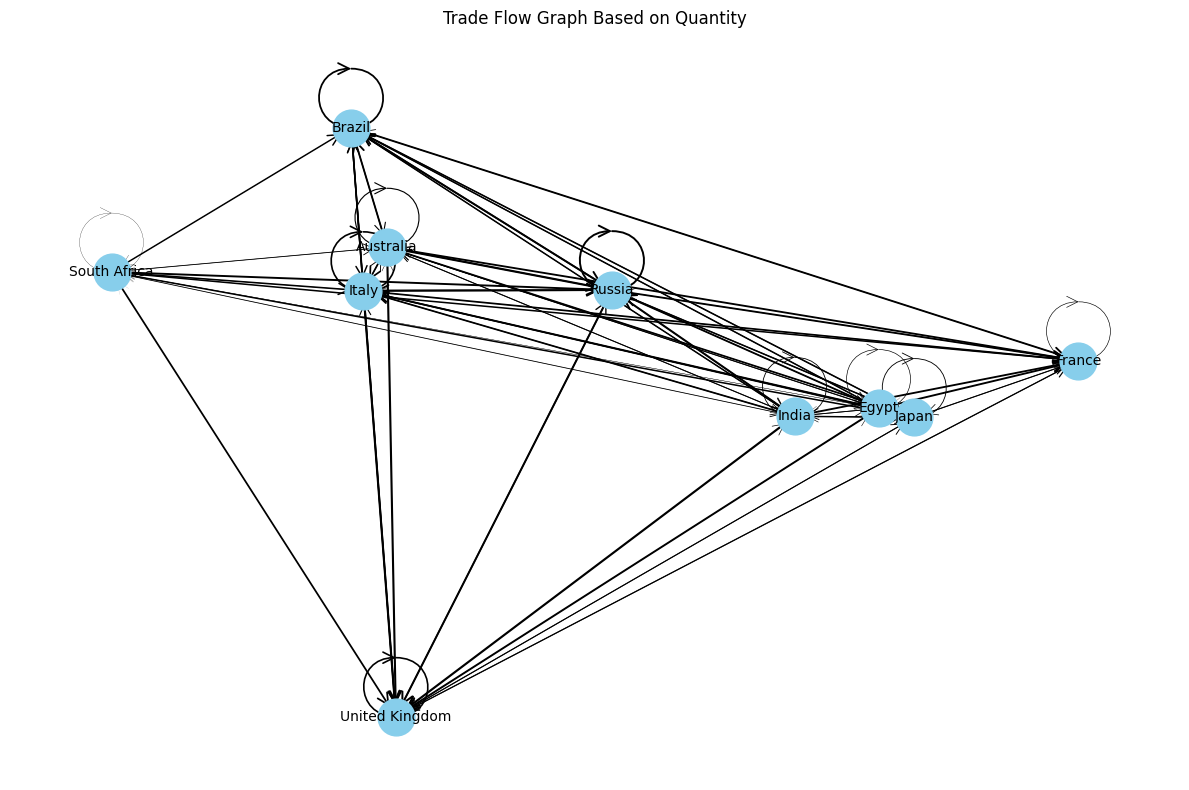

In [41]:
G = nx.DiGraph()

# Add edges with weights
for _, row in shipments.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    quantity = row['Quantity']
    G.add_edge(origin, destination, weight=quantity)

# Get edge weights for edge thickness
weights = [G[u][v]['weight'] / 100000 for u, v in G.edges()]  # Adjust divisor for thickness scaling

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)  # Better layout
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, width=weights, arrowstyle='->', arrowsize=20)

plt.title('Trade Flow Graph Based on Quantity')
plt.axis('off')
plt.tight_layout()
plt.savefig('outputs/02_output_trade_flow_graph.png', dpi=300)

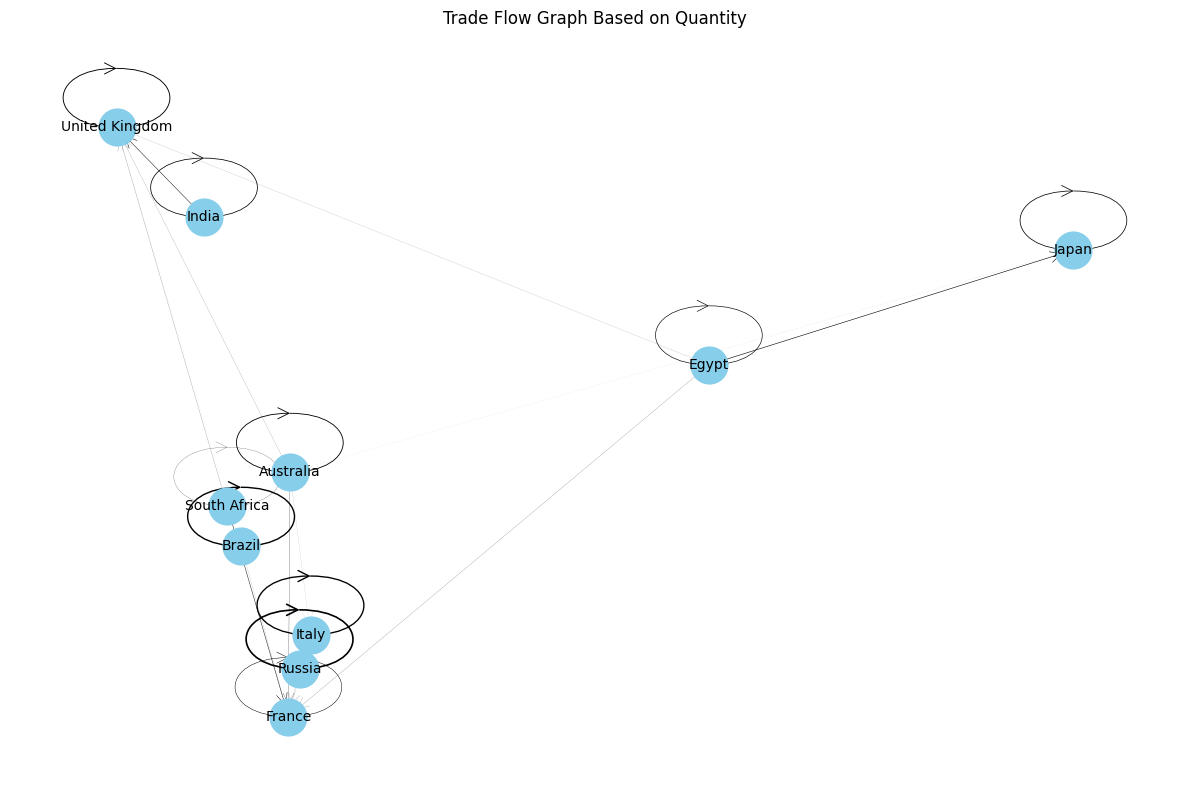

In [33]:
G = nx.DiGraph()

# Add edges with weights
for _, row in shipments.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    quantity = row['Quantity']
    G.add_edge(origin, destination, weight=quantity)

# Get edge weights for edge thickness
weights = [G[u][v]['weight'] / 1000000 for u, v in G.edges()]  # Adjust divisor for thickness scaling

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)  # Better layout
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, width=weights, arrowstyle='->', arrowsize=20)

plt.title('Trade Flow Graph Based on Quantity')
plt.axis('off')
plt.tight_layout()
plt.savefig('outputs/03_output_trade_flow_graph.png', dpi=300)